# Global Power Plant Database Project

## Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
#importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the Datset
df=pd.read_csv("Power Plant Dataset")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

## Understanding the columns of the Dataset

The database includes the following indicators:

country(text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 
country_long (text): longer form of the country designation
name(text): name or title of the power plant, generally in Romanized form
gppd_idnr(text): 10 or 12 character identifier for the power plant, must be unique for all thwe power Plants 
capacity_mw(number): electrical generating capacity in megawatts
latitude(number): geolocation in decimal degrees; WGS84 (EPSG:4326)
longitude(number): geolocation in decimal degrees; WGS84 (EPSG:4326)
other_fuel1(text): energy source used in electricity generation or export
other_fuel2(text): energy source used in electricity generation or export
other_fuel3(text): energy source used in electricity generation or export
commissioning_year(number): year of plant operation, weighted by unit-capacity when data is available
owner(text): majority shareholder of the power plant, generally in Romanized form
source(text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url(text): web document corresponding to the `source` field
geolocation_source(text): attribution for geolocation information
wepp_id(text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
year_of_capacity_data(number): year the capacity information was reported
generation_gwh_2013(number): electricity generation in gigawatt-hours reported for the year 2013
generation_gwh_2014(number): electricity generation in gigawatt-hours reported for the year 2014
generation_gwh_2015(number): electricity generation in gigawatt-hours reported for the year 2015
generation_gwh_2016(number): electricity generation in gigawatt-hours reported for the year 2016
generation_gwh_2017(number): electricity generation in gigawatt-hours reported for the year 2017
generation_gwh_2018(number): electricity generation in gigawatt-hours reported for the year 2018
generation_gwh_2019(number): electricity generation in gigawatt-hours reported for the year 2019
generation_data_source(text): attribution for the reported generation information
estimated_generation_gwh(number): estimated electricity generation in gigawatt-hours


Target Column:
primary_fuel(text): energy source used in primary electricity generation or export

## Exploratory Data Ananlysis

In [4]:
df.shape

(908, 25)

In the Dataset, we have 908 rows and 25 columns

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We can check the datatypes of the columns. The columns are of float and object data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

No Null Values available in the columns

In [8]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [9]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [10]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

<AxesSubplot:>

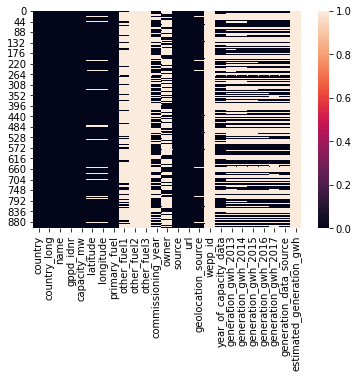

In [11]:
#plotting heatmap to check for null values
sns.heatmap(df.isnull())

In [12]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh','commissioning_year','country','country_long','name','gppd_idnr','source','url'],  axis = 1, inplace = True)

In [13]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In the target column, 8 Unique count values

In [14]:
#Checking for any empty observation in target column
df.loc[df['primary_fuel'] == " "]

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source


No empty observations in the target column

In [15]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

## Feature Engineering

In [16]:
df['latitude'].fillna(df['latitude'].median(), inplace = True)
df['longitude'].fillna(df['longitude'].median(), inplace = True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(), inplace = True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace = True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace = True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace = True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(), inplace = True)

Above columns have alot of outliers and outliers impact the mean, hence we choose ,median to fill the missing values in the columns

In [17]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace = True)

In [18]:
df.fillna({'generation_data_source':'Central Electricity Authority', 'year_of_capacity_data':2018.0}, inplace=True)

In [19]:
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

We have successfully removed all nan values

In [20]:
df.shape

(908, 12)

## Summary Statistics

In [21]:
df.describe()

,capacity_mw,latitude,longitude,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.225679,77.410936,2018.0,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766
std,580.221767,6.089450,4.783873,0.0,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626
min,0.000000,8.168900,68.644700,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
50%,60.000000,21.778300,76.719250,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
max,4760.000000,34.649000,95.408000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


<AxesSubplot:>

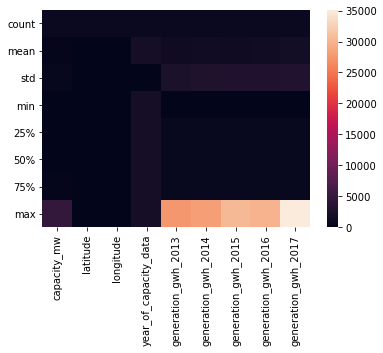

In [22]:
sns.heatmap(df.describe())

Observations:
    
    1)From the count row, we can see that some of the columns have null values. 
    2)Mean is greater than the 2nf quantile in some of the columns indicating skewness 
    3)The difference between the 3rd quantile and the max values have a lot of difference indicating that some columns
    have outliers.
    4)in some of the columns, extreme outliers present.

## Visualization:

### Univariate Ananlysis:

In [23]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,2018.0,797.063475,805.76,701.02725,716.72835,807.6017,Central Electricity Authority
1,98.0,24.7663,74.6090,Coal,WRI,2018.0,797.063475,805.76,701.02725,716.72835,807.6017,Central Electricity Authority


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

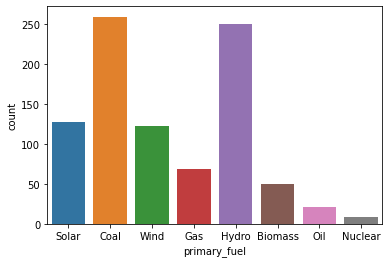

In [24]:
sns.countplot(df["primary_fuel"])

Data imbalancing issue in target column. We might need to perform scaling on the column

## Numerical Data Plotting

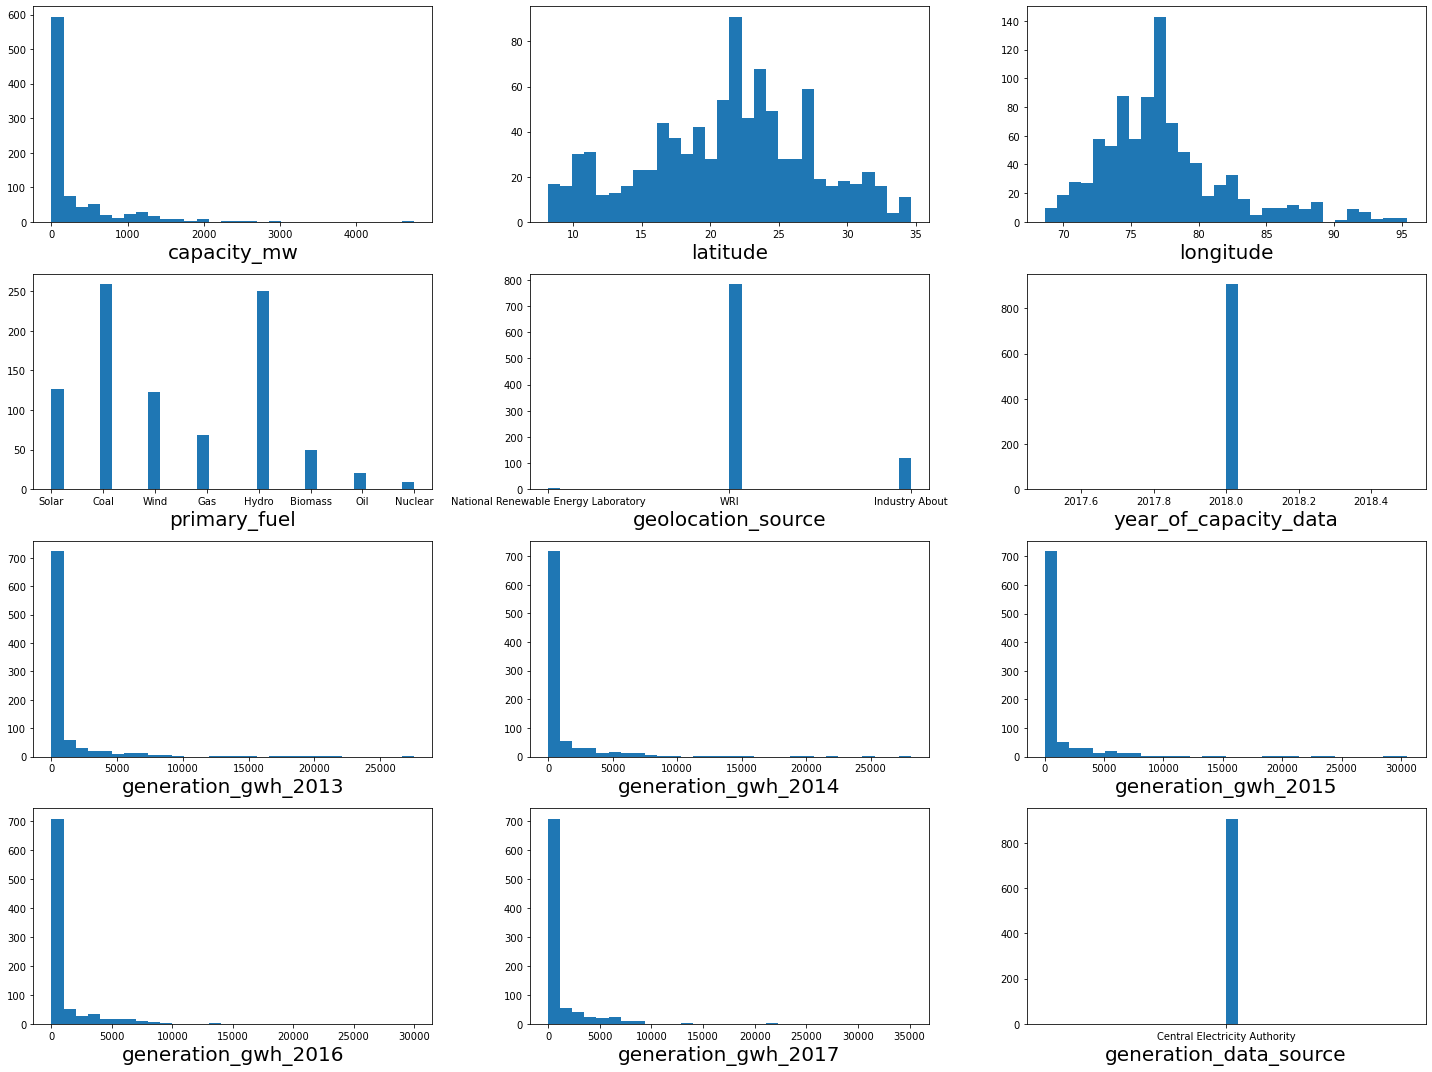

In [25]:
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
       ax = plt.subplot(4,3, plotnumber)
       plt.hist(df[column], bins=30)
       plt.xlabel(column,fontsize = 20)
       
    plotnumber += 1
    
plt.tight_layout()

## Bivariate Analysis:

<AxesSubplot:title={'center':'Comparision between capacity mw and primary fuel'}, xlabel='capacity_mw', ylabel='primary_fuel'>

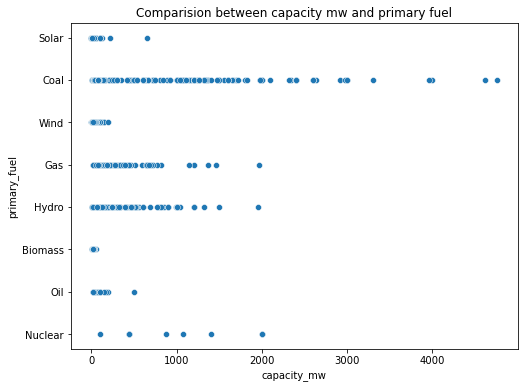

In [26]:
plt.figure(figsize=(8,6))
plt.title("Comparision between capacity mw and primary fuel")
sns.scatterplot(df['capacity_mw'],df['primary_fuel'])

From above table we can identify that the electrical generating capacity is mostly between 0-1000 for the primary fuel and the capacity mw is going beyond 1300

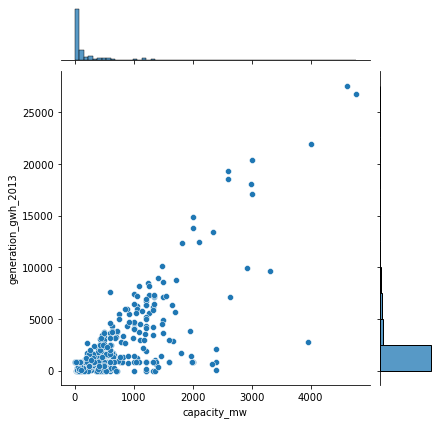

In [27]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2013',data=df)

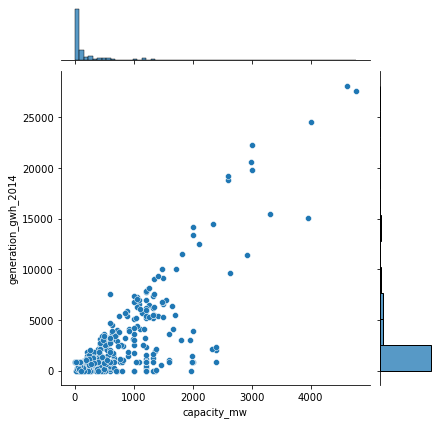

In [28]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2014',data=df)

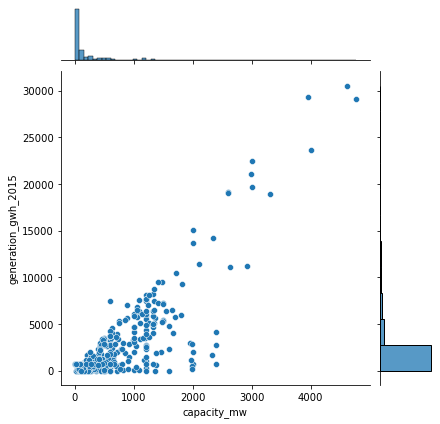

In [29]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2015',data=df)

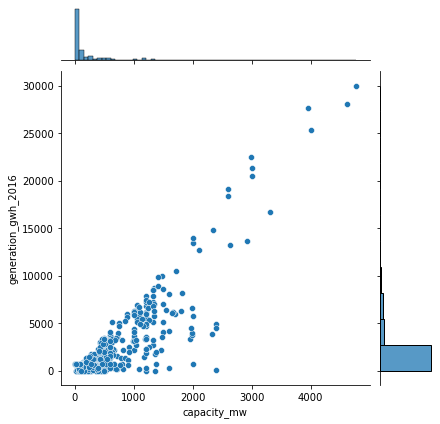

In [30]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2016',data=df)

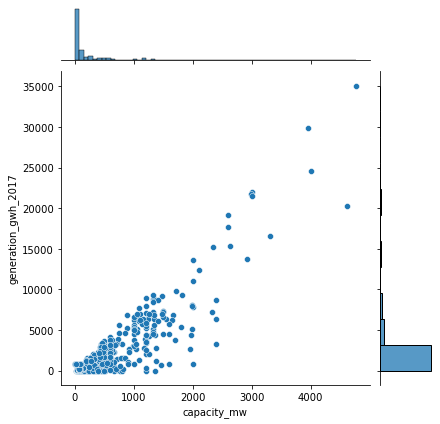

In [31]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2017',data=df)

We can clearly visualise the outliers in the above jointplots and hist plots.

## Multivariate Aanalysis

<Figure size 1440x1080 with 0 Axes>

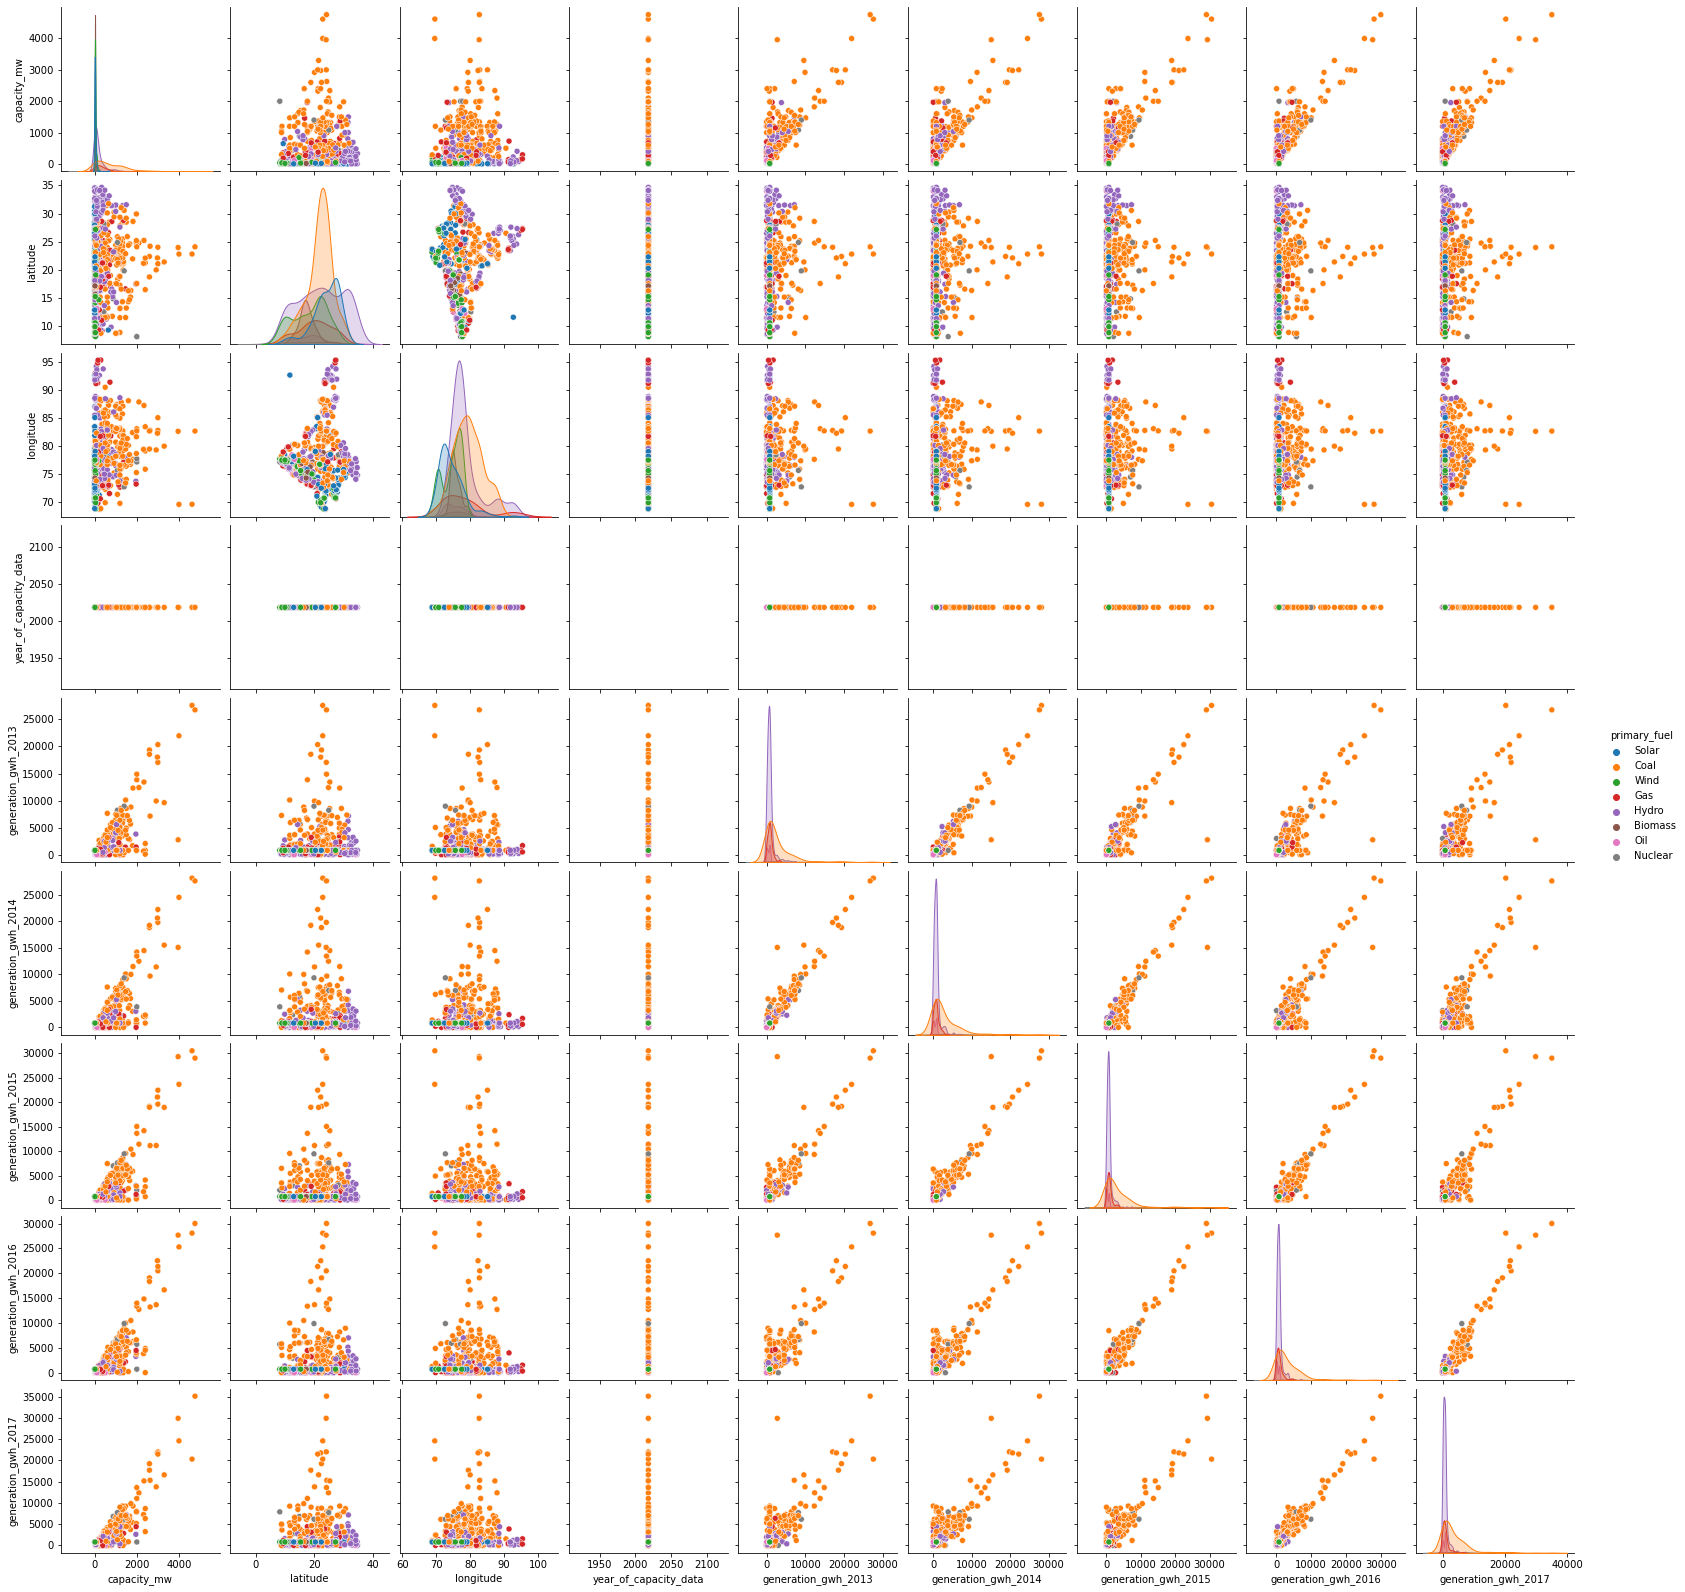

In [32]:
plt.figure(figsize = (20,15), facecolor = 'white')
sns.pairplot(df,hue="primary_fuel")

## Data Cleaning

### Checking for Outliers

There are null values present in columns: latitude, longitude, other_fuel1,commissioning_year,owner,Total_Gen

<AxesSubplot:>

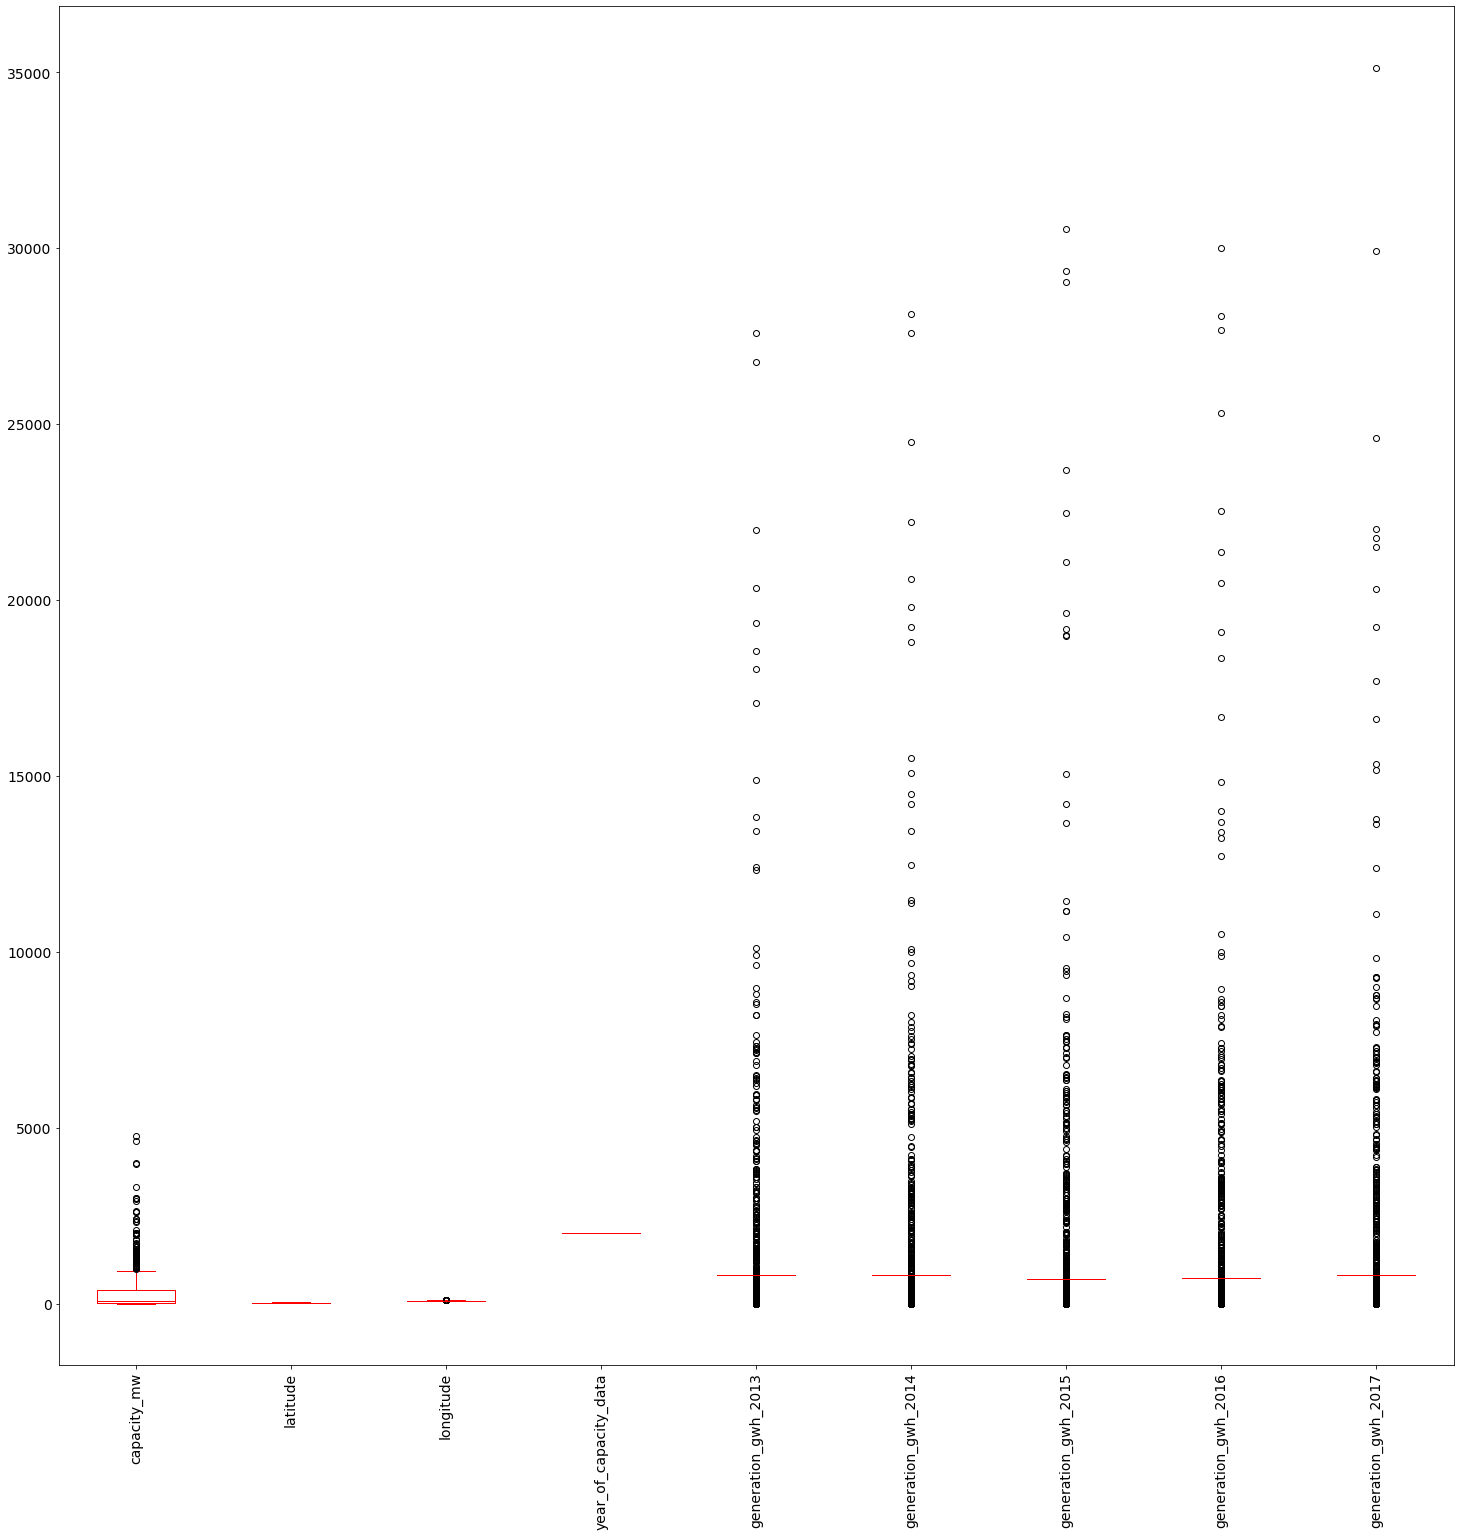

In [33]:
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

By observing the plot i can notice that most of the columns have outliers except for latitude.We need to check and remove the outliers

### Removing Outliers:

#### i) Z-score Method:

In [34]:
from scipy.stats import zscore

In [35]:
zout= df[['longitude', 'capacity_mw', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

Above are the columns with outliers

In [36]:
z=np.abs(zscore(zout))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
1,98.0,24.7663,74.6090,Coal,WRI,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
2,39.2,21.9038,69.3732,Wind,WRI,2018.0,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
3,135.0,23.8712,91.3602,Gas,WRI,2018.0,631.777928,617.789264,843.74700,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,WRI,2018.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,Central Electricity Authority


In [37]:
df_new.shape

(866, 12)

The new data set have 866 rows and 12 columns

In [38]:
df.shape

(908, 12)

The old data set had 908 rows and 12 columns

#### Data Loss Percentage

In [39]:
loss=(((908-866)/908)*100)
loss

4.6255506607929515

Using zscore to remove outliers the data loss is 4.6% 

#### ii) IQR Method

In [40]:
q1=zout.quantile(0.25)
q3=zout.quantile(0.75)
IQR=q3-q1

df_1=df[~((df < (q1 - 1.5 *IQR))| ((df > (q3 +1.5 *IQR)))).any(axis=1)]

In [41]:
df_1.shape

(449, 12)

#### Data Loss Percentage

In [42]:
loss1=(((908-449)/908)*100)
loss1

50.55066079295154

Using IQR Menthod to remove outliers the data loss is 50.5%

When compared both the methods, we can see the data loss is more in IQR menthod. Hence we will use z-score method. df_new is the new Dataframe now

## Checking for Skewness

In [43]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

In [44]:
df_new.skew()

capacity_mw              2.021865
latitude                -0.120533
longitude                0.892126
year_of_capacity_data    0.000000
generation_gwh_2013      3.124673
generation_gwh_2014      2.976604
generation_gwh_2015      2.766274
generation_gwh_2016      2.710642
generation_gwh_2017      2.604487
dtype: float64

I can observe that skewness is present in columns:
    capacity_mw
    longitude
    generation_gwh_2013
    generation_gwh_2014
    generation_gwh_2015
    generation_gwh_2016
    generation_gwh_2017

In [45]:
col=['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [46]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove the skewness 

df_new[col]=scaler.fit_transform(df_new[col].values)

In [47]:
df_new['capacity_mw'], param = stats.boxcox(df_new.capacity_mw+1)
df_new['longitude'], param = stats.boxcox(df_new.longitude+1)
df_new['generation_gwh_2013'], param = stats.boxcox(df_new.generation_gwh_2013+1)
df_new['generation_gwh_2014'], param = stats.boxcox(df_new.generation_gwh_2014+1)
df_new['generation_gwh_2015'], param = stats.boxcox(df_new.generation_gwh_2015+1)
df_new['generation_gwh_2016'], param = stats.boxcox(df_new.generation_gwh_2016+1)
df_new['generation_gwh_2017'], param = stats.boxcox(df_new.generation_gwh_2017+1)

In [48]:
df_new.skew()

capacity_mw              0.015534
latitude                -0.120533
longitude                0.000000
year_of_capacity_data    0.000000
generation_gwh_2013      0.274276
generation_gwh_2014      0.230129
generation_gwh_2015      0.165323
generation_gwh_2016      0.151625
generation_gwh_2017      0.128050
dtype: float64

We have removed the skewness from continuous columns

## Label Encoding:

In [49]:
cats=['primary_fuel','geolocation_source','generation_data_source']

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[cats]=df_new[cats].apply(le.fit_transform)

In [51]:
df_new[cats].head()

,primary_fuel,geolocation_source,generation_data_source
0,6,1,0
1,1,2,0
2,7,2,0
3,2,2,0
4,1,2,0


The categorical data has been encoded using label transformer

In [52]:
df_new.head(2)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,1.232045,28.1839,0.232929,6,1,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
1,4.324441,24.7663,0.232929,1,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0


Above is the new data set after encoding

## Correlation matrix using heat map:

In [53]:
cor=df_new.corr()

In [54]:
cor

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
capacity_mw,1.000000,0.054932,0.340313,-0.519129,0.472044,NaN,0.298831,0.306462,0.327760,0.354912,0.333752,NaN
latitude,0.054932,1.000000,-0.073277,-0.003728,-0.197104,NaN,0.075898,0.110875,0.108262,0.128753,0.111210,NaN
longitude,0.340313,-0.073277,1.000000,-0.411418,0.298059,NaN,0.040908,0.030094,0.029725,0.087908,0.075876,NaN
primary_fuel,-0.519129,-0.003728,-0.411418,1.000000,-0.477835,NaN,-0.135284,-0.134164,-0.153855,-0.174389,-0.152210,NaN
geolocation_source,0.472044,-0.197104,0.298059,-0.477835,1.000000,NaN,0.012057,0.010836,0.014127,0.014873,0.007137,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.298831,0.075898,0.040908,-0.135284,0.012057,NaN,1.000000,0.906162,0.783840,0.741781,0.674597,NaN
generation_gwh_2014,0.306462,0.110875,0.030094,-0.134164,0.010836,NaN,0.906162,1.000000,0.838470,0.784671,0.714782,NaN
generation_gwh_2015,0.327760,0.108262,0.029725,-0.153855,0.014127,NaN,0.783840,0.838470,1.000000,0.883498,0.775609,NaN
generation_gwh_2016,0.354912,0.128753,0.087908,-0.174389,0.014873,NaN,0.741781,0.784671,0.883498,1.000000,0.903132,NaN


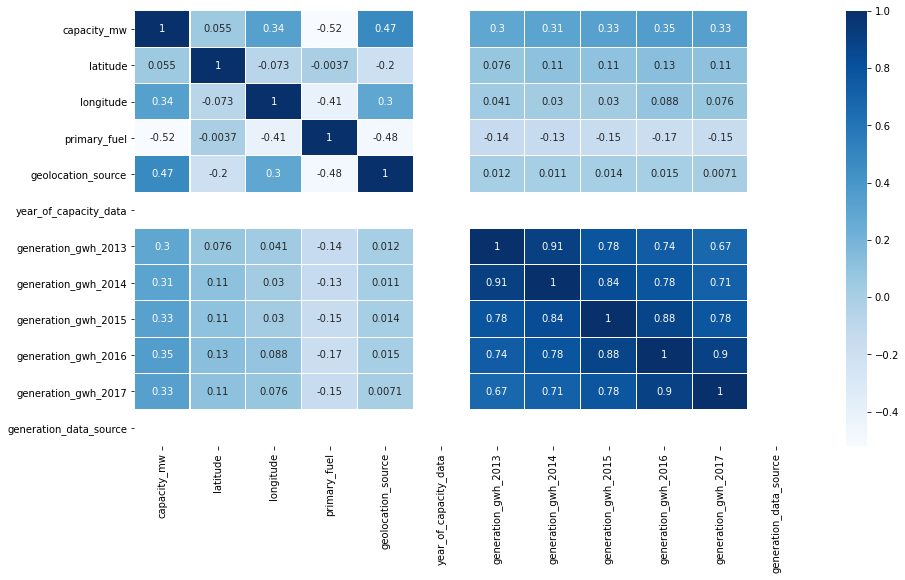

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="Blues",annot=True)
plt.show()

- Very light and very dark shaded blocks are higly correlated.
- generation_gwh_202n columns are highly correlated
- By looking the target correlation it looks difficult to analyse so let me plot bar graph for target correlation.

### Visualizing target column correlation using bar plot:

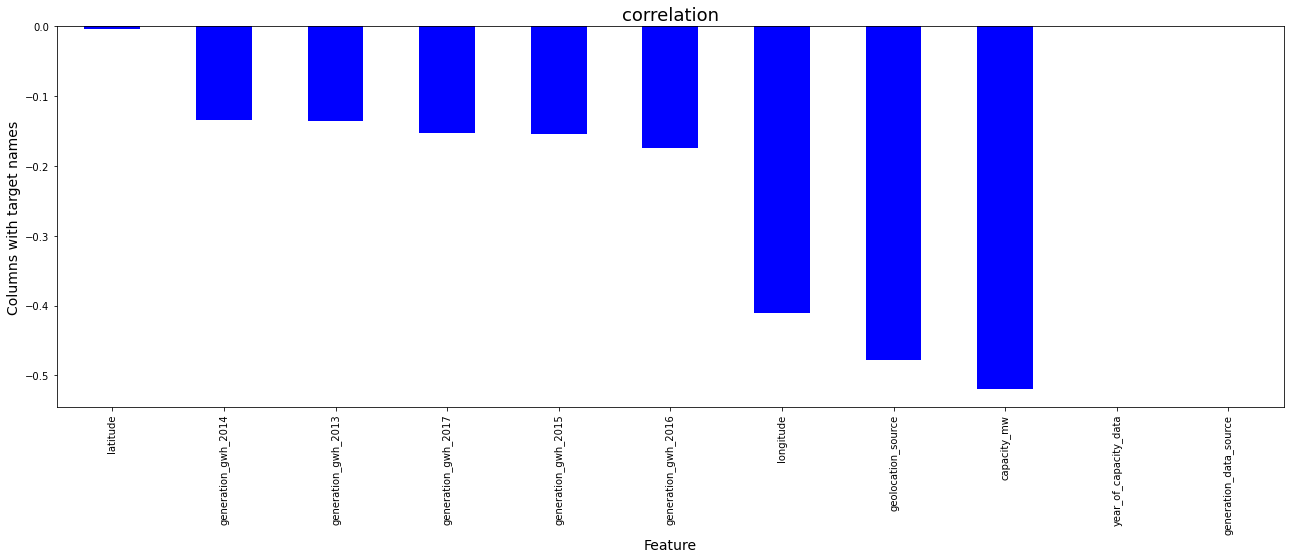

In [56]:
plt.figure(figsize=(22,7))
cor["primary_fuel"].sort_values(ascending=False).drop(["primary_fuel"]).plot(kind='bar',color='b')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()


## Preprocessing

In [57]:
x = df_new.drop("primary_fuel",axis=1)
y = df_new["primary_fuel"]

In [58]:
x

,capacity_mw,latitude,longitude,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,1.232045,28.1839,0.232929,1,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
1,4.324441,24.7663,0.232929,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
2,3.517571,21.9038,0.232929,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
3,4.604128,23.8712,0.232929,2,2018.0,18.919952,19.306627,18.835503,18.879379,18.630634,0
4,6.793643,21.9603,0.232929,2,2018.0,26.181181,32.972615,34.177969,34.105614,36.468032,0
...,...,...,...,...,...,...,...,...,...,...,...
903,6.697128,16.2949,0.232929,2,2018.0,20.476117,21.162239,0.758144,12.181125,20.351249,0
904,1.360954,12.8932,0.232929,0,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
905,3.137875,15.2758,0.232929,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
906,4.146461,24.3500,0.232929,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0


In [59]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 866, dtype: int32

## Scaling the data using STandard Scaler

In [60]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [63]:

scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[-1.68083136,  1.14561823, -0.93275533, ..., -0.03690407,
        -0.01770737,  0.        ],
       [ 0.23882982,  0.59055452, -0.50763707, ..., -0.03690407,
        -0.01770737,  0.        ],
       [-0.26204943,  0.12564644, -2.38834816, ..., -0.03690407,
        -0.01770737,  0.        ],
       ...,
       [-0.49775266, -0.95082894, -0.22946655, ..., -0.03690407,
        -0.01770737,  0.        ],
       [ 0.12834594,  0.52294186, -0.77041952, ..., -0.03690407,
        -0.01770737,  0.        ],
       [-0.73507004, -1.81834336,  0.26225287, ..., -0.03690407,
        -0.01770737,  0.        ]])

## Finding Best Random state

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [65]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)

Best Accuracy score is: 0.7730769230769231 On Random state:  42


In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.30)

In [67]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.68      0.70      0.69        70
           2       0.54      0.39      0.45        18
           3       0.69      0.68      0.69        69
           4       0.00      0.00      0.00         1
           5       0.40      0.57      0.47         7
           6       1.00      0.92      0.96        39
           7       0.63      0.78      0.70        40

    accuracy                           0.69       260
   macro avg       0.57      0.55      0.55       260
weighted avg       0.70      0.69      0.69       260



In [68]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.6477642681549398


In [69]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred =RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.73      0.86      0.79        70
           2       0.40      0.11      0.17        18
           3       0.69      0.77      0.73        69
           4       0.00      0.00      0.00         1
           5       0.40      0.57      0.47         7
           6       1.00      0.92      0.96        39
           7       0.64      0.68      0.66        40

    accuracy                           0.72       260
   macro avg       0.58      0.54      0.53       260
weighted avg       0.71      0.72      0.71       260



In [70]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.7125041525480035


In [71]:

SV = SVC()
SV.fit(x_train,y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.61      0.77      0.68        70
           2       0.00      0.00      0.00        18
           3       0.68      0.65      0.67        69
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       1.00      0.92      0.96        39
           7       0.47      0.78      0.58        40

    accuracy                           0.64       260
   macro avg       0.35      0.39      0.36       260
weighted avg       0.57      0.64      0.59       260



In [72]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.3349478439970766


Got RandomForestClassfier as best model compare to others so will use hyperparameter tuning on the same

## Hyperparameter Tuning

In [73]:
# RandomForestClassifier
param = {'n_estimators':[100,500,700],
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10],
        'max_features':['auto','sqrt','log2']}

In [74]:
GC = GridSearchCV(RFC,param,cv=5)

In [75]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 700]})

In [77]:
GC.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [78]:
final_rfc = RandomForestClassifier(criterion = 'entropy',max_depth = 10, max_features = 'auto',n_estimators = 100)
final_rfc.fit(x_train,y_train)
pred = final_rfc.predict(x_test)
acc = accuracy_score(pred,y_test)
print(acc*100)

71.15384615384616


## Predicting on Capacity_mw¶

In [83]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,1.232045,28.1839,0.232929,6,1,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
1,4.324441,24.7663,0.232929,1,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
2,3.517571,21.9038,0.232929,7,2,2018.0,20.476117,21.162239,17.749344,17.649931,19.890346,0
3,4.604128,23.8712,0.232929,2,2,2018.0,18.919952,19.306627,18.835503,18.879379,18.630634,0
4,6.793643,21.9603,0.232929,1,2,2018.0,26.181181,32.972615,34.177969,34.105614,36.468032,0


In [84]:
x1 = df_new.drop(columns=['capacity_mw'])
y1 = df_new['capacity_mw']

Splitting feature and target into x1 and y1 as feature and target respectively

In [85]:
scaler_c=StandardScaler()
x_scaler_c=scaler_c.fit_transform(x1)
x_scaler_c

array([[ 1.14561823, -0.93275533,  1.18562048, ..., -0.03690407,
        -0.01770737,  0.        ],
       [ 0.59055452, -0.50763707, -0.98601094, ..., -0.03690407,
        -0.01770737,  0.        ],
       [ 0.12564644, -2.38834816,  1.61994677, ..., -0.03690407,
        -0.01770737,  0.        ],
       ...,
       [-0.95082894, -0.22946655,  1.61994677, ..., -0.03690407,
        -0.01770737,  0.        ],
       [ 0.52294186, -0.77041952, -0.98601094, ..., -0.03690407,
        -0.01770737,  0.        ],
       [-1.81834336,  0.26225287,  1.61994677, ..., -0.03690407,
        -0.01770737,  0.        ]])

## Finding best Random State

In [86]:
# Importing important libraries for model fitting
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [88]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler_c,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    rsc = r2_score(y1_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.783872192715901 On Random state:  144


In [89]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler_c,y1,test_size=0.30,random_state=i)

In [90]:
lr = LinearRegression()
lr.fit(x1_train,y1_train)
pred = lr.predict(x1_test)
print(r2_score(y1_test,pred))

0.4773300849870251


In [91]:
print(cross_val_score(lr,x_scaler_c,y1,cv=5).mean())

0.41970357199260827


In [92]:
dt = DecisionTreeRegressor()
dt.fit(x1_train,y1_train)
pred = dt.predict(x1_test)
print(r2_score(y1_test,pred))

0.6713542812454594


In [93]:
print(cross_val_score(dt,x_scaler_c,y1,cv=5).mean())

0.6549995975469568


In [94]:
rf = RandomForestRegressor()
rf.fit(x1_train,y1_train)
pred = rf.predict(x1_test)
print(r2_score(y1_test,pred))

0.8067525009730199


In [95]:
print(cross_val_score(rf,x_scaler_c,y1,cv=5).mean())

0.7841412124833537


Best model after comparing from cv score we got RandomForest as a best model so will do hyperparameter tuning on the same

## Checking whether my model is overfitting model or not using lasso and ridge

### i)Lasso 

In [96]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x1_train,y1_train)

LassoCV(normalize=True)

In [97]:
alpha = lassocv.alpha_
alpha

3.265439511574225e-05

In [98]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x1_train,y1_train)

Lasso(alpha=3.265439511574225e-05)

In [99]:
lasso_reg.score(x1_test,y1_test)

0.4773229189528828

### ii)Ridge

In [100]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x1_train,y1_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [101]:
alpha = ridgecv.alpha_
alpha

0.1

In [102]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x1_train,y1_train)

Ridge(alpha=0.1)

In [103]:
ridge_reg.score(x1_test,y1_test)

0.477335745209281

Our model is not an overfitting model as checked via ridge and lasso getting almost same score as in linear regression

## Hyperparameter Tuning

In [104]:
# RandomForestRegressor
param_r = {'n_estimators':[120,180,230,425,500,700],
        'criterion':['mse','mae'],
        'max_depth':[5,10,15,20,25,30],
        'max_features':['auto','sqrt','log2'],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[2,4,6]}

In [105]:
RF = RandomizedSearchCV(rf,param_r,cv=5)

In [106]:
RF.fit(x1_train,y1_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [120, 180, 230, 425,
                                                         500, 700]})

In [107]:
RF.best_params_

{'n_estimators': 425,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'mse'}

In [108]:
final_RFC = RandomForestRegressor(min_samples_split = 10,min_samples_leaf = 2,criterion = 'mse',max_depth = 20, max_features = 'auto',n_estimators = 425)
final_RFC.fit(x1_train,y1_train)
pred = final_RFC.predict(x1_test)
score = r2_score(pred,y1_test)
print(score*100)

77.36535486046904


Even after increasing parameter too score has been reduced compare to r2_score

## Save the model

In [109]:
import joblib
joblib.dump(final_rfc,'FinalmodelGlobalpowerplant.pk1')

['FinalmodelGlobalpowerplant.pk1']